In [1]:
#Heart Data Set = 5209 rows

In [2]:
#Import all modules from the SWAT package.
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.core.display import display, HTML
%matplotlib inline

In [3]:
#Establsih REST Connection to SAS Viya Environment from Jupyter
#S is used to represent the Session
s = swat.CAS('viya.globalhls.sashq-d.openstack.sas.com','8777','sdkngr','Orion123', protocol='http')

In [4]:
#The s.upload_file() method uploads a data file as-is to CAS and invokes the table.loadtable action in the background to parse it.
heart = s.CASTable("heart", replace=True)
s.upload_file('https://raw.githubusercontent.com/nielsgroenning/pythonbeginners/master/HEART.csv',casout=heart)

NOTE: Cloud Analytic Services made the uploaded file available as table HEART in caslib CASUSER(sdkngr).
NOTE: The table HEART has been created in caslib CASUSER(sdkngr) from binary data uploaded to Cloud Analytic Services.


CASTable('HEART', caslib='CASUSER(sdkngr)')

In [5]:
heart.head(10)

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol,Chol_Status,BP_Status,Weight_Status,Smoking_Status
0,Dead,Other,NaN,Female,29.0,62.50,140.0,78.0,124.0,121.0,0.0,55.0,NaN,,Normal,Overweight,Non-smoker
1,Dead,Cancer,NaN,Female,41.0,59.75,194.0,92.0,144.0,183.0,0.0,57.0,181.0,Desirable,High,Overweight,Non-smoker
2,Alive,,NaN,Female,57.0,62.25,132.0,90.0,170.0,114.0,10.0,NaN,250.0,High,High,Overweight,Moderate (6-15)
3,Alive,,NaN,Female,39.0,65.75,158.0,80.0,128.0,123.0,0.0,NaN,242.0,High,Normal,Overweight,Non-smoker
4,Alive,,NaN,Male,42.0,66.00,156.0,76.0,110.0,116.0,20.0,NaN,281.0,High,Optimal,Overweight,Heavy (16-25)
5,Alive,,NaN,Female,58.0,61.75,131.0,92.0,176.0,117.0,0.0,NaN,196.0,Desirable,High,Overweight,Non-smoker
6,Alive,,NaN,Female,36.0,64.75,136.0,80.0,112.0,110.0,15.0,NaN,196.0,Desirable,Normal,Overweight,Moderate (6-15)
7,Dead,Other,NaN,Male,53.0,65.50,130.0,80.0,114.0,99.0,0.0,77.0,276.0,High,Normal,Normal,Non-smoker
8,Alive,,NaN,Male,35.0,71.00,194.0,68.0,132.0,124.0,0.0,NaN,211.0,Borderline,Normal,Overweight,Non-smoker
9,Dead,Cerebral Vascular Disease,NaN,Male,52.0,62.50,129.0,78.0,124.0,106.0,5.0,82.0,284.0,High,Normal,Normal,Light (1-5)


In [6]:
#CAS actions for simple statistics. 
s.actionsetinfo().setinfo.actionset

0      accessControl
1      accessControl
2           builtins
3      configuration
4     dataPreprocess
5           dataStep
6         percentile
7             search
8            session
9        sessionProp
10            simple
11             table
Name: actionset, dtype: object

In [7]:
#Load the "simple" CAS actionset to do simple statistics
s.loadactionset('simple')

NOTE: Added action set 'simple'.


[actionset]

 'simple'

+ Elapsed: 0.000584s, user: 0.000242s, sys: 0.000312s, mem: 0.194mb

In [8]:
#Summary Statistics
heart.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,AgeCHDdiag,32.0,90.0,1449.0,3760.0,63.302968,91726.0,10.018215,0.263182,100.364639,5.951856e+06,1.453280e+05,15.825823,240.529251,0.0,-0.009968,-0.106100
1,AgeAtStart,28.0,62.0,5209.0,0.0,44.068727,229554.0,8.574954,0.118810,73.529838,1.049910e+07,3.829434e+05,19.458139,370.916268,0.0,0.194759,-1.101644
2,Height,51.5,76.5,5203.0,6.0,64.813185,337223.0,3.582707,0.049669,12.835792,2.192327e+07,6.677179e+04,5.527745,1304.905127,0.0,0.177420,-0.396057
3,Weight,67.0,300.0,5203.0,6.0,153.086681,796510.0,28.915426,0.400869,836.101866,1.262845e+08,4.349402e+06,18.888270,381.886867,0.0,0.555941,0.522756
4,Diastolic,50.0,160.0,5209.0,0.0,85.358610,444633.0,12.973091,0.179749,168.301098,3.882977e+07,8.765121e+05,15.198339,474.876895,0.0,0.875944,1.854242
5,Systolic,82.0,300.0,5209.0,0.0,136.909580,713162.0,23.739596,0.328924,563.568435,1.005738e+08,2.935064e+06,17.339617,416.234127,0.0,1.487577,4.228371
6,MRW,67.0,268.0,5203.0,6.0,119.957525,624139.0,19.983401,0.277040,399.336335,7.694752e+07,2.077348e+06,16.658731,432.997106,0.0,1.132376,3.342027
7,Smoking,0.0,60.0,5173.0,36.0,9.366518,48453.0,12.031451,0.167281,144.755816,1.202513e+06,7.486771e+05,128.451689,55.992701,0.0,1.222404,0.986614
8,AgeAtDeath,36.0,93.0,1991.0,3218.0,70.536414,140438.0,10.559406,0.236649,111.501060,1.012788e+07,2.218871e+05,14.970149,298.063988,0.0,-0.316054,-0.365255
9,Cholesterol,96.0,568.0,5057.0,152.0,227.417441,1150050.0,44.935524,0.631893,2019.201302,2.717505e+08,1.020908e+07,19.759049,359.898832,0.0,0.816344,2.103768


In [9]:
#Pearson Correlation Coefficients
heart.correlation(simple=False)

,Variable,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,...,Nobs1,Nobs2,Nobs3,Nobs4,Nobs5,Nobs6,Nobs7,Nobs8,Nobs9,Nobs10
0,AgeCHDdiag,1.000000,0.550909,-0.210416,-0.137415,-0.035105,0.069241,0.006422,-0.283567,0.748112,...,1449.0,1449.0,1448.0,1447.0,1449.0,1449.0,1447.0,1440.0,894.0,1408.0
1,AgeAtStart,0.550909,1.000000,-0.131733,0.093519,0.275401,0.379379,0.204515,-0.167431,0.688605,...,1449.0,5209.0,5203.0,5203.0,5209.0,5209.0,5203.0,5173.0,1991.0,5057.0
2,Height,-0.210416,-0.131733,1.000000,0.517385,-0.014245,-0.071127,-0.136289,0.287032,-0.136575,...,1448.0,5203.0,5203.0,5199.0,5203.0,5203.0,5199.0,5167.0,1986.0,5051.0
3,Weight,-0.137415,0.093519,0.517385,1.000000,0.327568,0.263584,0.767171,0.088703,0.004604,...,1447.0,5203.0,5199.0,5203.0,5203.0,5203.0,5203.0,5167.0,1988.0,5051.0
4,Diastolic,-0.035105,0.275401,-0.014245,0.327568,1.000000,0.796061,0.385110,-0.064121,0.010039,...,1449.0,5209.0,5203.0,5203.0,5209.0,5209.0,5203.0,5173.0,1991.0,5057.0
5,Systolic,0.069241,0.379379,-0.071127,0.263584,0.796061,1.000000,0.362574,-0.092378,0.102174,...,1449.0,5209.0,5203.0,5203.0,5209.0,5209.0,5203.0,5173.0,1991.0,5057.0
6,MRW,0.006422,0.204515,-0.136289,0.767171,0.385110,0.362574,1.000000,-0.125237,0.102925,...,1447.0,5203.0,5199.0,5203.0,5203.0,5203.0,5203.0,5167.0,1988.0,5051.0
7,Smoking,-0.283567,-0.167431,0.287032,0.088703,-0.064121,-0.092378,-0.125237,1.000000,-0.285249,...,1440.0,5173.0,5167.0,5167.0,5173.0,5173.0,5167.0,5173.0,1971.0,5049.0
8,AgeAtDeath,0.748112,0.688605,-0.136575,0.004604,0.010039,0.102174,0.102925,-0.285249,1.000000,...,894.0,1991.0,1986.0,1988.0,1991.0,1991.0,1988.0,1971.0,1991.0,1922.0
9,Cholesterol,0.003629,0.273415,-0.079587,0.072428,0.183364,0.199350,0.137355,-0.011780,0.078444,...,1408.0,5057.0,5051.0,5051.0,5057.0,5057.0,5051.0,5049.0,1922.0,5057.0


In [10]:
#Load CAS Actionset regression
s.loadactionset('regression')

NOTE: Added action set 'regression'.


[actionset]

 'regression'

+ Elapsed: 0.0187s, user: 0.00619s, sys: 0.0125s, mem: 0.219mb

In [11]:
heart.glm(target='Height', inputs=['Cholesterol'])

[ANOVA]

 Analysis of Variance
 
    RowId           Source      DF            SS          MS     FValue  \
 0  MODEL            Model     1.0    411.466126  411.466126  32.184304   
 1  ERROR            Error  5049.0  64549.864922   12.784683        NaN   
 2  TOTAL  Corrected Total  5050.0  64961.331048         NaN        NaN   
 
           ProbF  
 0  1.480300e-08  
 1           NaN  
 2           NaN  

[Dimensions]

 Dimensions
 
       RowId           Description  Value
 0  NEFFECTS     Number of Effects      2
 1    NPARMS  Number of Parameters      2

[FitStatistics]

 Fit Statistics
 
        RowId Description         Value
 0       RMSE    Root MSE      3.575568
 1    RSQUARE    R-Square      0.006334
 2     ADJRSQ    Adj R-Sq      0.006137
 3        AIC         AIC  17926.199347
 4       AICC        AICC  17926.204102
 5        SBC         SBC  12886.254030
 6  TRAIN_ASE         ASE     12.779621

[ModelInfo]

 Model Information
 
          RowId        Description   Value
 0         DATA        Data Source   HEART
 1  RESPONSEVAR  Response Variable  Height

[NObs]

 Number of Observations
 
    RowId                  Description   Value
 0  NREAD  Number of Observations Read  5209.0
 1  NUSED  Number of Observations Used  5051.0

[ParameterEstimates]

 Parameter Estimates
 
         Effect    Parameter  DF   Estimate    StdErr      tValue         Probt
 0    Intercept    Intercept   1  66.270593  0.259548  255.331006  0.000000e+00
 1  Cholesterol  Cholesterol   1  -0.006352  0.001120   -5.673121  1.480300e-08

[Timing]

 Task Timing
 
             RowId                  Task      Time   RelTime
 0           SETUP     Setup and Parsing  0.013280  0.336296
 1    LEVELIZATION          Levelization  0.003510  0.088886
 2  INITIALIZATION  Model Initialization  0.000917  0.023221
 3            SSCP      SSCP Computation  0.004631  0.117275
 4         FITTING         Model Fitting  0.009697  0.245562
 5         CLEANUP               Cleanup  0.007410  0.187643
 6           TOTAL                 Total  0.039489  1.000000

+ Elapsed: 0.0408s, user: 0.0213s, sys: 0.029s, mem: 7.74mb

In [ ]:
#Load CAS Actionset Decision Tree
s.loadactionset('decisiontree')

In [ ]:
forest1 = heart.Foresttrain()

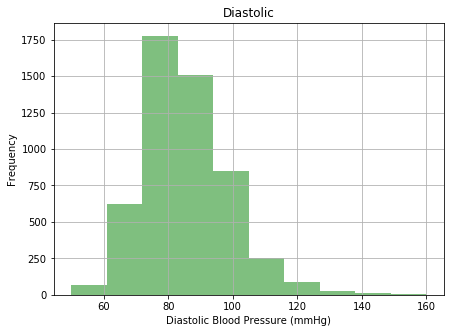

In [12]:
heart.hist(column="Diastolic", alpha=0.5, color="green", label=None)
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.gcf().set_size_inches((7, 5)) 

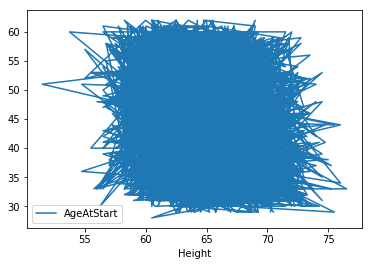

In [13]:
heart.plot(x="Height", y="AgeAtStart")

In [14]:
heart.plot.pie(y="AgeAtStart")

ValueError: Image size of 368x78160 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

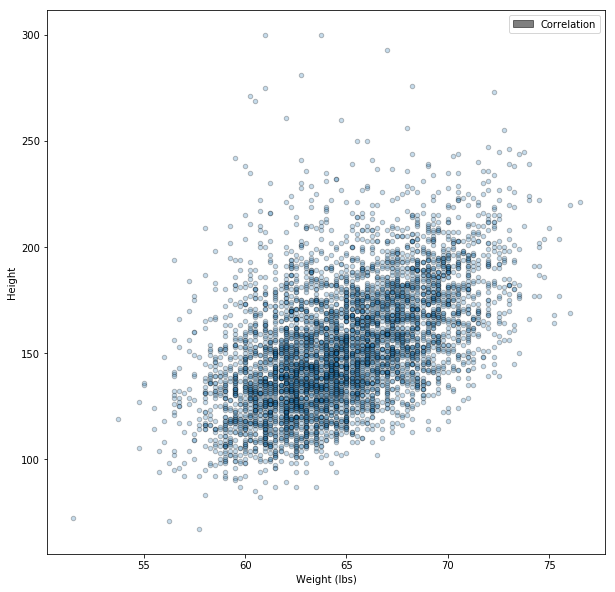

In [15]:
#This method fetches the data from the CAS table and uses the pandas.DataFrame.plot.scatter() method to plot it. 
heart.plot.scatter('Height', 'Weight', alpha=0.25, s=None, c=None, edgecolor='black')
black_patch = mpatches.Patch(color='black', alpha=0.5, label='Correlation')
plt.legend(handles=[black_patch])
plt.xlabel("Weight (lbs)")
plt.ylabel("Height")
plt.gcf().set_size_inches((10, 10)) 

In [16]:
#This method fetches the data from the CAS table and calls the pandas.DataFrame.boxplot() method to do the rendering.
heart.boxplot(column="Weight", showmeans="Weight", showfliers=False, flierprops=red_square)

NameError: name 'red_square' is not defined

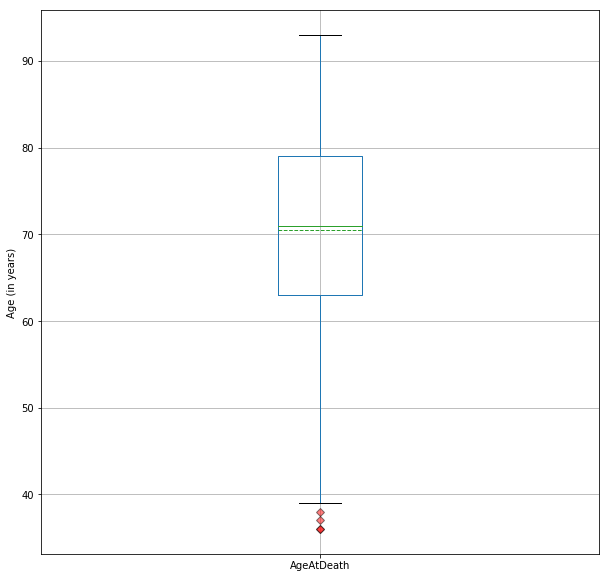

In [17]:
green_diamond = dict(markerfacecolor='r', marker='D', alpha=0.5)
heart.boxplot(column="AgeAtDeath", showmeans="AgeAtDeath", showfliers=True, flierprops=green_diamond, meanline=True)
plt.ylabel("Age (in years)")
plt.gcf().set_size_inches((10, 10)) 

In [ ]:
s.help(history)